# Fraud Detection EDA

## Imports and Global Settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import plot, plot_correlation, plot_missing

pd.set_option('display.max_columns', 500)

NumExpr defaulting to 4 threads.


## Load Data

In [14]:
original_data = pd.read_json('../data/working_data.json', orient='records', lines=True)

filename = "model_data_v2"
current_data = pd.read_json(f'../data/{filename}.json', orient='records', lines=True)

od = original_data.copy()
cd = current_data.copy()

features_to_test = [
        "body_length", "channels", "delivery_method", "fb_published",
        "gts", "has_analytics", "has_header", "has_logo", "listed",
        "name_length", "num_order", "num_payouts", "org_facebook",
        "org_twitter", "user_type", "sale_duration", "sale_duration2",
        "show_map", "user_age", "venue_latitude", "venue_longitude",
        "num_previous_payouts", "previous_payouts_total",
        "num_ticket_types", "num_tickets_available", "total_ticket_value",
        "avg_ticket_cost", "known_payee_name", "known_venue_name",
        "known_payout_type", "total_empty_values", "name_proba",
        "description_proba", "org_name_proba", "org_desc_proba", "is_fraud"
        ]

cd = cd[features_to_test]

## Basic EDA

In [15]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11469 entries, 0 to 11468
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   body_length             11469 non-null  int64  
 1   channels                11469 non-null  int64  
 2   delivery_method         11469 non-null  int64  
 3   fb_published            11469 non-null  int64  
 4   gts                     11469 non-null  float64
 5   has_analytics           11469 non-null  int64  
 6   has_header              11469 non-null  int64  
 7   has_logo                11469 non-null  int64  
 8   listed                  11469 non-null  int64  
 9   name_length             11469 non-null  int64  
 10  num_order               11469 non-null  int64  
 11  num_payouts             11469 non-null  int64  
 12  org_facebook            11469 non-null  int64  
 13  org_twitter             11469 non-null  int64  
 14  user_type               11469 non-null

In [16]:
cd.describe()

body_length      channels  delivery_method  fb_published  \
count  11469.000000  11469.000000     11469.000000  11469.000000   
mean    3681.236812      6.188595         0.439707      0.128956   
std     5730.995137      3.862602         0.594091      0.335166   
min        0.000000      0.000000        -1.000000      0.000000   
25%      758.000000      5.000000         0.000000      0.000000   
50%     2014.000000      6.000000         0.000000      0.000000   
75%     4296.000000      8.000000         1.000000      0.000000   
max    65535.000000     13.000000         3.000000      1.000000   

                 gts  has_analytics    has_header      has_logo        listed  \
count   11469.000000   11469.000000  11469.000000  11469.000000  11469.000000   
mean     2487.781116       0.072369     -0.252332      0.844886      0.859534   
std      9665.369446       0.259109      0.664365      0.362029      0.347485   
min         0.000000       0.000000     -1.000000      0.000000      0.000000   
25%       116.190000       0.000000     -1.000000      1.000000      1.000000   
50%       433.870000       0.000000      0.000000      1.000000      1.000000   
75%      1550.900000       0.000000      0.000000      1.000000      1.000000   
max    306293.930000       1.000000      1.000000      1.000000      1.000000   

        name_length     num_order   num_payouts  org_facebook   org_twitter  \
count  11469.000000  11469.000000  11469.000000  11469.000000  11469.000000   
mean      41.765629     28.121545     33.224605      7.966082      4.310489   
std       23.248112     95.419441    122.348651     11.779629      6.012481   
min        0.000000      0.000000      0.000000     -1.000000     -1.000000   
25%       26.000000      2.000000      0.000000      0.000000      0.000000   
50%       38.000000      8.000000      2.000000      0.000000      0.000000   
75%       53.000000     23.000000     13.000000     14.000000     11.000000   
max      253.000000   2000.000000   1858.000000     91.000000     23.000000   

          user_type  sale_duration  sale_duration2     show_map      user_age  \
count  11469.000000   11469.000000    11469.000000  11469.00000  11469.000000   
mean       2.722120      46.728921       51.004360      0.84323    374.956055   
std        1.711575      54.636411       59.738961      0.36360    420.692271   
min        1.000000    -143.000000      -86.000000      0.00000      0.000000   
25%        1.000000      16.000000       17.000000      1.00000     13.000000   
50%        3.000000      32.000000       35.000000      1.00000    241.000000   
75%        3.000000      59.000000       64.000000      1.00000    605.000000   
max      103.000000     980.000000      980.000000      1.00000   3794.000000   

       venue_latitude  venue_longitude  num_previous_payouts  \
count    11469.000000     11469.000000          11469.000000   
mean        32.461559       -55.146589             76.217107   
std         21.662695        65.918239            237.402777   
min        -45.045208      -159.390183              0.000000   
25%         32.716911       -95.435076              2.000000   
50%         39.207216       -77.150095              8.000000   
75%         43.688564        -1.000000             37.000000   
max         64.844022       176.169492           2048.000000   

       previous_payouts_total  num_ticket_types  num_tickets_available  \
count            1.146900e+04      11469.000000           1.146900e+04   
mean             8.644447e+04          2.704333           8.134105e+03   
std              4.911169e+05          3.855432           3.767656e+05   
min              0.000000e+00          0.000000           0.000000e+00   
25%              6.100000e+02          1.000000           3.800000e+01   
50%              5.227540e+03          2.000000           1.000000e+02   
75%              3.142026e+04          3.000000           3.000000e+02   
max              1.162565e+07        116.000000       

In [17]:
cd.head()

body_length  channels  delivery_method  fb_published      gts  \
0          516        13                0             0    10.00   
1            0         0                0             0   106.49   
2          710         6                0             0    25.06   
3         2263         8                0             0   290.00   
4           73         8                1             0  1018.98   

   has_analytics  has_header  has_logo  listed  name_length  num_order  \
0              0          -1         1       1           52          1   
1              0           0         1       1           24          1   
2              0          -1         1       1           46          2   
3              0          -1         1       1           37         19   
4              0           0         1       1           64         19   

   num_payouts  org_facebook  org_twitter  user_type  sale_duration  \
0            0            40            0          3             18   
1          204             0            0          5              2   
2            0            18            0          1             60   
3            2            23            9          1             46   
4           95             0            0          3             85   

   sale_duration2  show_map  user_age  venue_latitude  venue_longitude  \
0              18         1        19       41.831702       -73.030114   
1               2         0       432       -1.000000        -1.000000   
2              60         1         0       43.181042       -79.226171   
3              46         1         0       40.740865       -73.994083   
4              85         1       450       33.825753       -84.355145   

   num_previous_payouts  previous_payouts_total  num_ticket_types  \
0                     1                    8.46                 2   
1                   434                93147.16                 1   
2                     2                   32.00                 1   
3                     3                  749.80                 3   
4                   152                73066.86                 1   

   num_tickets_available  total_ticket_value  avg_ticket_cost  \
0                     50                0.00             0.00   
1                      3              300.00           100.00   
2                     50              550.00            11.00   
3                     57              589.95            10.35   
4                     35             1225.00            35.00   

   known_payee_name  known_venue_name  known_payout_type  total_empty_values  \
0                 1                 1                  1                   8   
1                 0                 0                  1                  13   
2                 0                 1                  1                   8   
3                 1                 1                  1                   5   
4                 0                 1                  1                   6   

   name_proba  description_proba  org_name_proba  org_desc_proba   is_fraud  
0    0.029556           0.000988        0.000000        0.085772  Not Fraud  
1    0.016040           0.166302        0.007818        0.172547  Not Fraud  
2    0.058722           0.002598        0.003306        0.027124  Not Fraud  
3    0.038386           0.008422        0.003773        0.019527  Not Fraud  
4    0.030987           0.009454        0.000000        0.014919  Not Fraud

## Advanced EDA with Dataprep.eda

  0%|          | 0/354 [00:00<?, ?it/s]


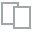
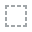
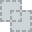
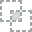
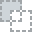
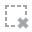
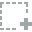
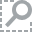
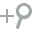
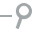
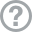
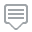
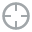
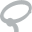
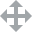
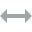
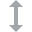
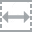
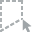
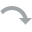
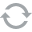
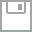
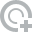
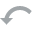
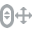
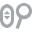
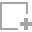
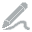
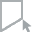
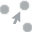
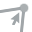
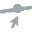

In [18]:
plot_missing(cd)

100%|##########| 4/4 [00:00<?, ?it/s]


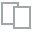
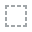
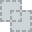
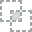
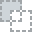
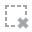
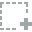
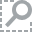
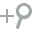
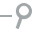
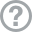
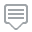
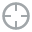
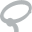
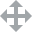
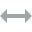
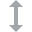
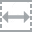
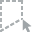
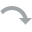
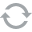
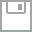
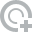
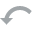
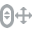
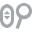
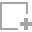
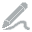
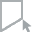
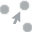
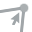
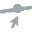

In [19]:
plot_correlation(cd)

  0%|          | 0/108 [00:00<?, ?it/s]


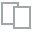
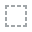
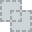
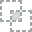
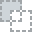
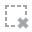
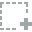
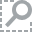
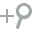
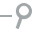
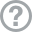
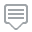
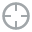
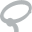
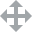
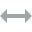
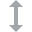
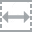
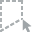
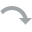
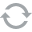
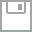
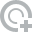
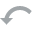
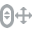
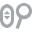
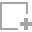
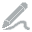
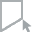
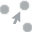
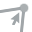
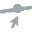

In [20]:
plot(cd, 'body_length')

  0%|          | 0/30 [00:00<?, ?it/s]


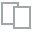
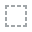
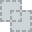
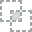
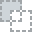
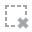
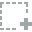
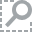
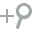
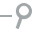
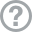
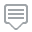
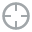
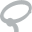
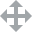
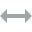
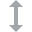
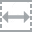
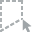
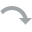
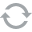
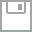
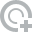
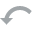
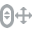
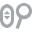
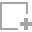
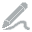
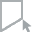
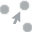
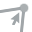
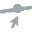

In [21]:
plot(cd, 'body_length', 'is_fraud')

## Seaborn Plotting Comparing Fraud vs Not Fraud

In [192]:
def compare_fraud_vs_not_fraud(df, feature, title, save=False):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1 = sns.kdeplot(ax=ax1, data=df, x=feature,
                hue="is_fraud", fill=True, palette=['cornflowerblue', 'lightcoral'],
               common_norm=False)
    ax1.set_title(title, fontsize=24, pad=10)
    ax1.set_xlabel(feature.replace('_', ' ').title(), fontsize=18)
    ax1.set_ylabel('Density', fontsize=18)
    ax1.get_legend().set_title(None)
    plt.setp(ax1.get_legend().get_texts(), fontsize='18')
    for patch in ax1.get_legend().get_patches():
        patch.set_height(12)
    
    fig.tight_layout(pad=0)
    
    if save:
        plt.savefig(f'../images/{feature}_comparison.png', dpi=300,
                    bbox_inches='tight', facecolor='w')

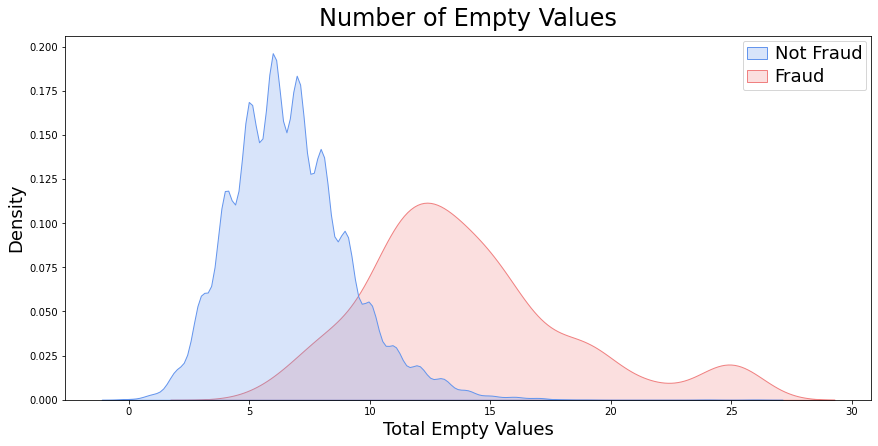

In [193]:
feature = 'total_empty_values'
compare_fraud_vs_not_fraud(cd, feature, 'Number of Empty Values', save=False)

/home/jeff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


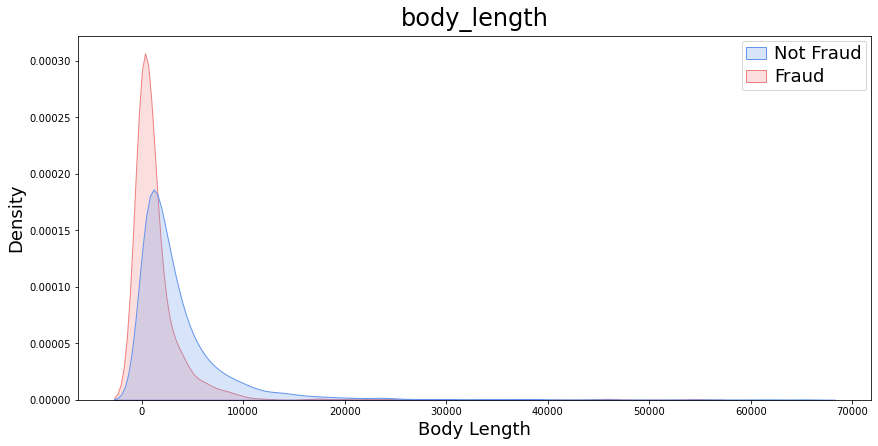

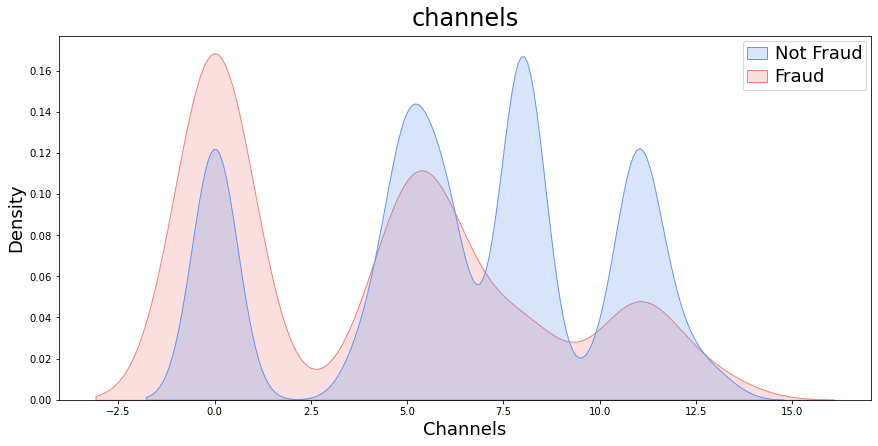

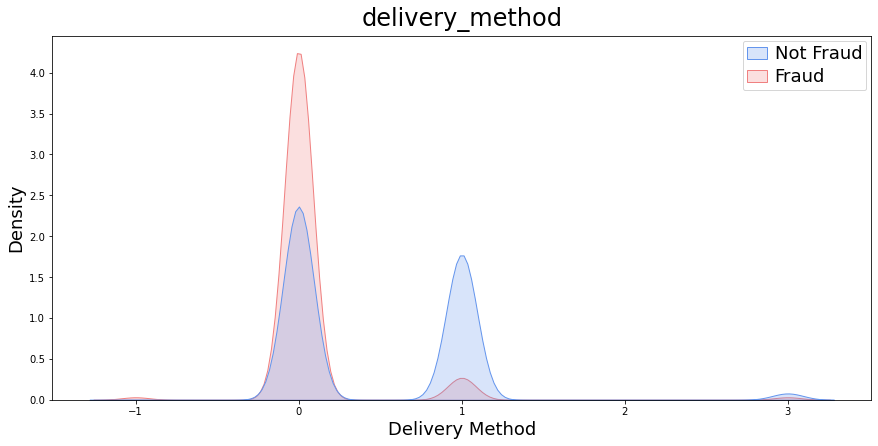

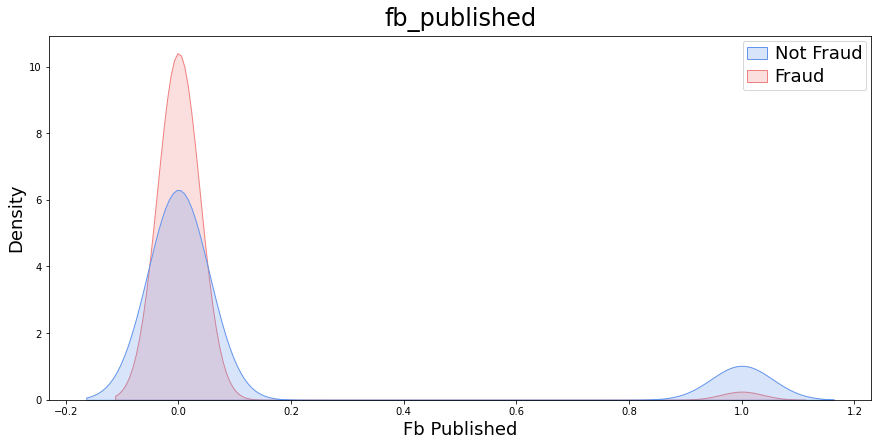

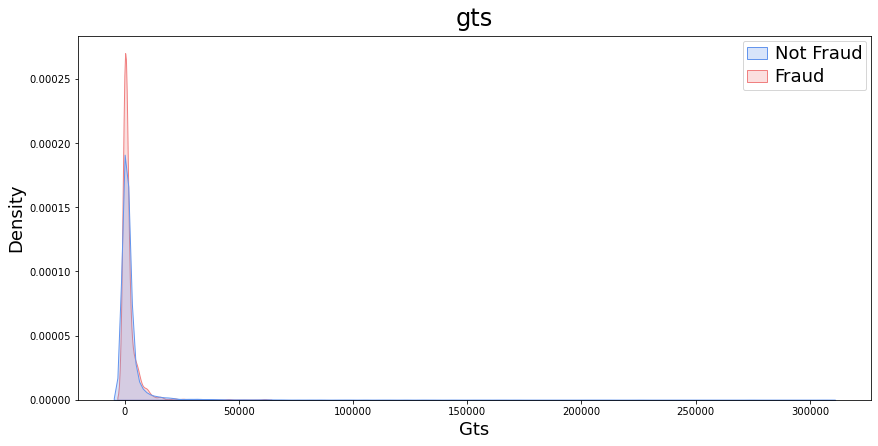

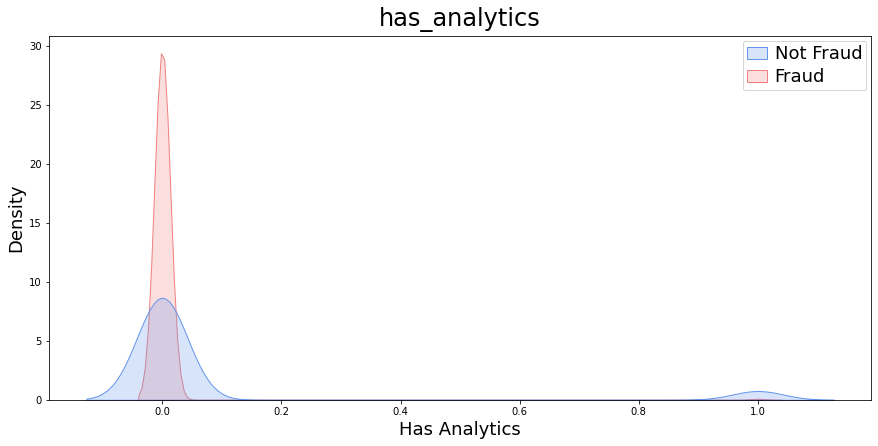

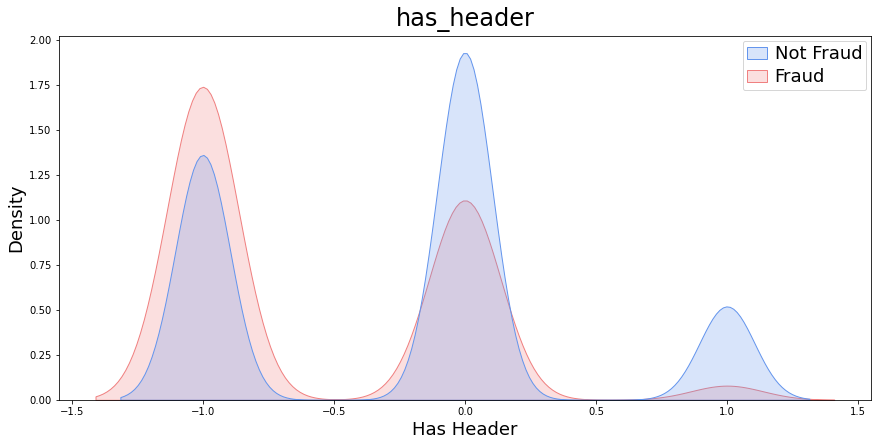

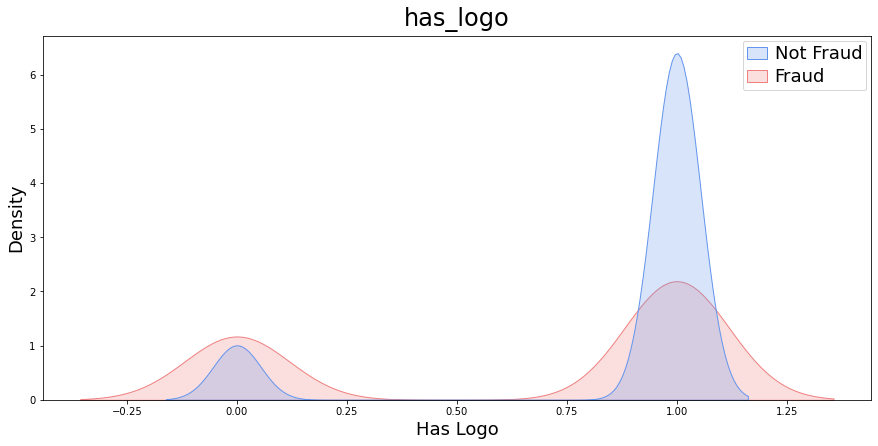

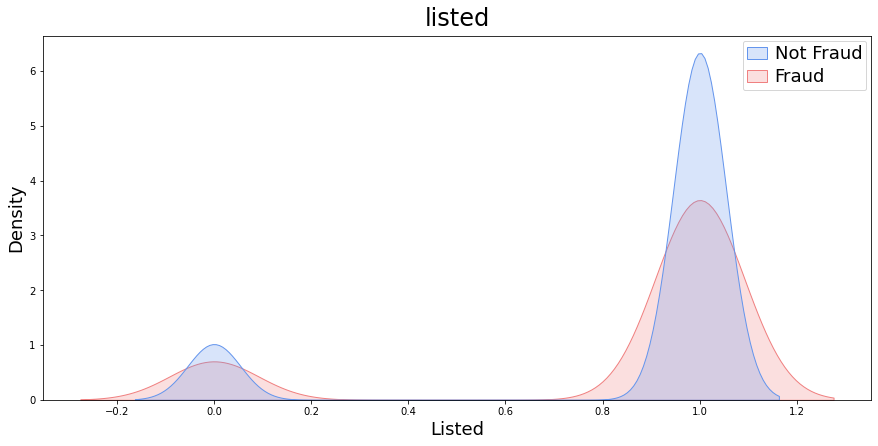

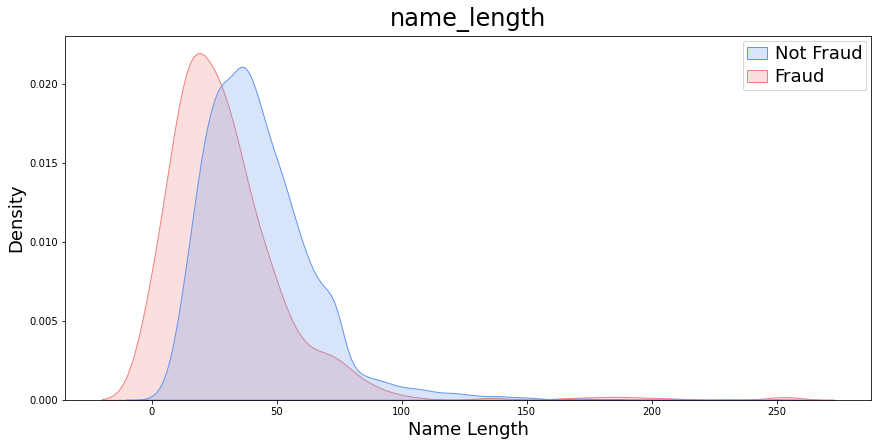

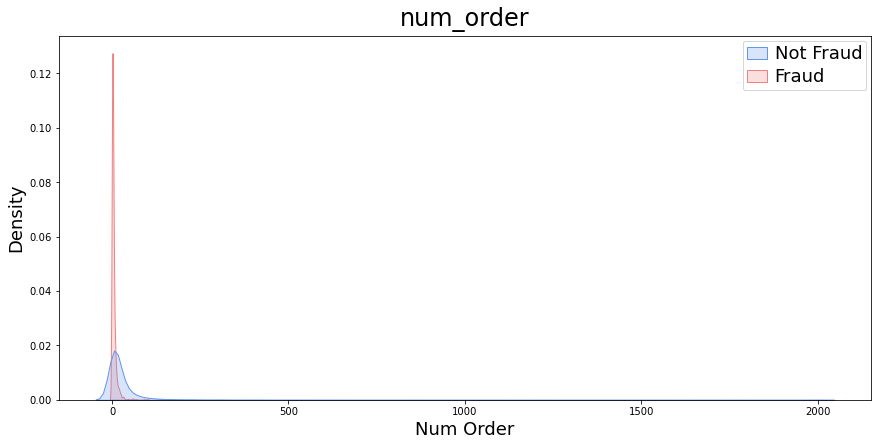

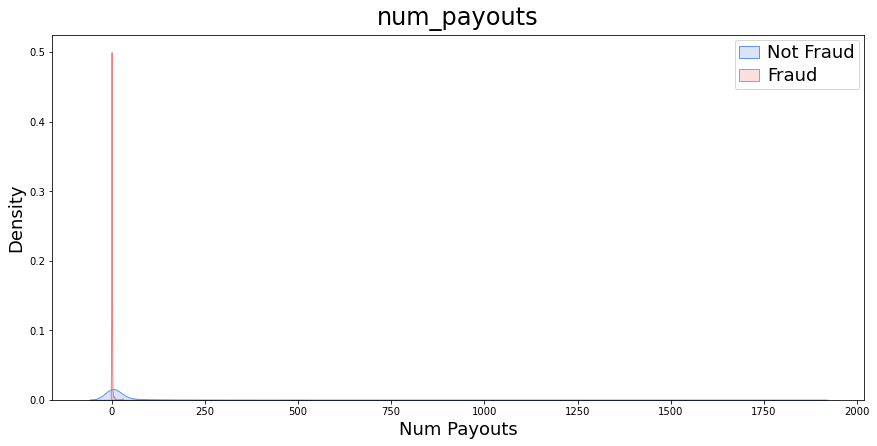

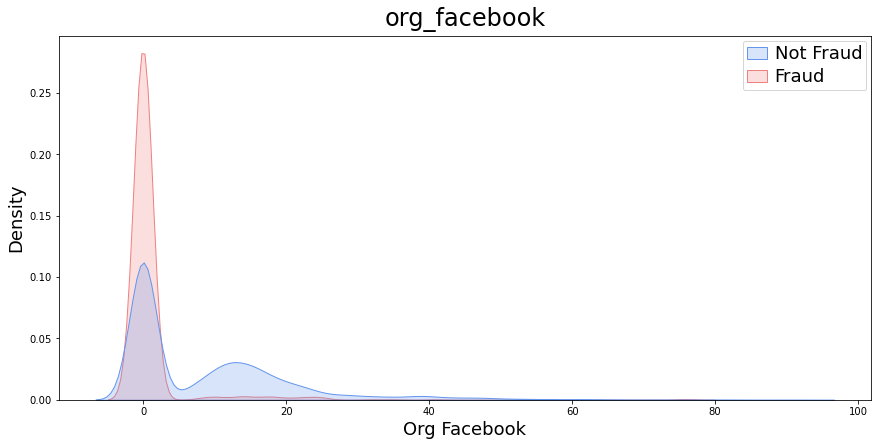

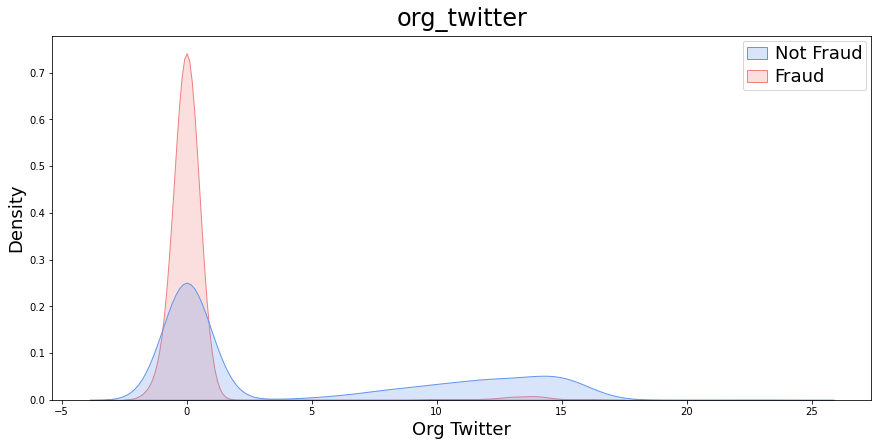

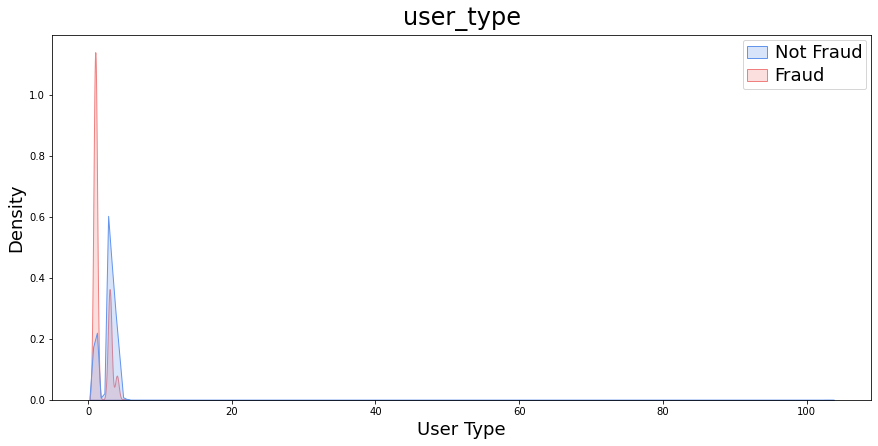

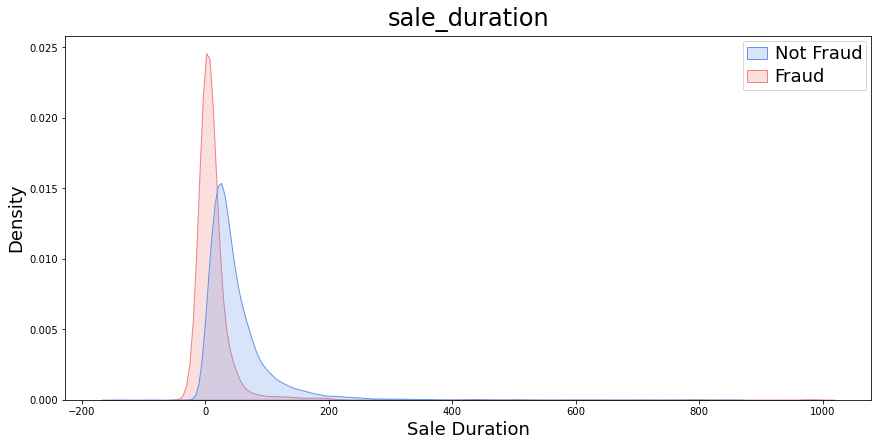

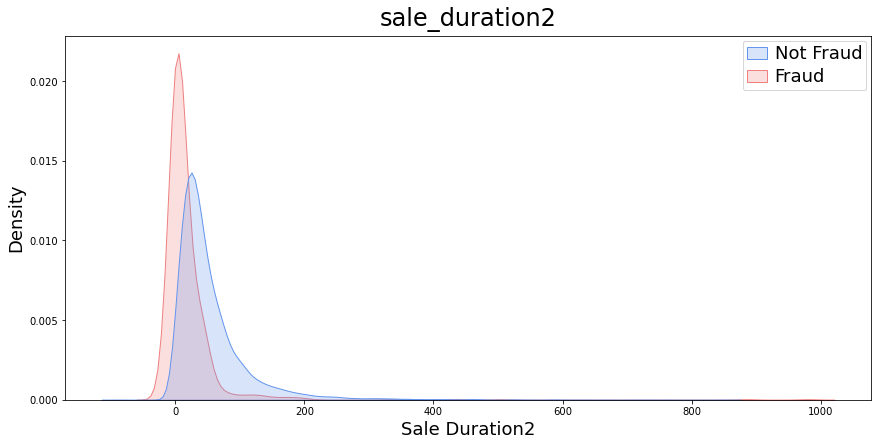

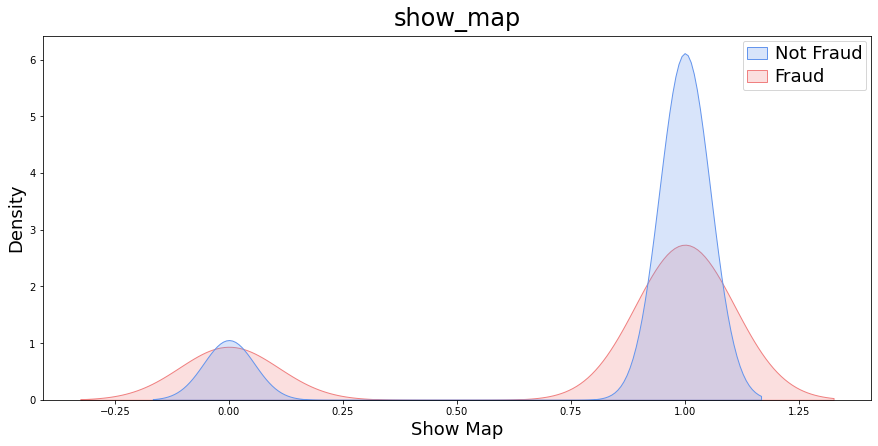

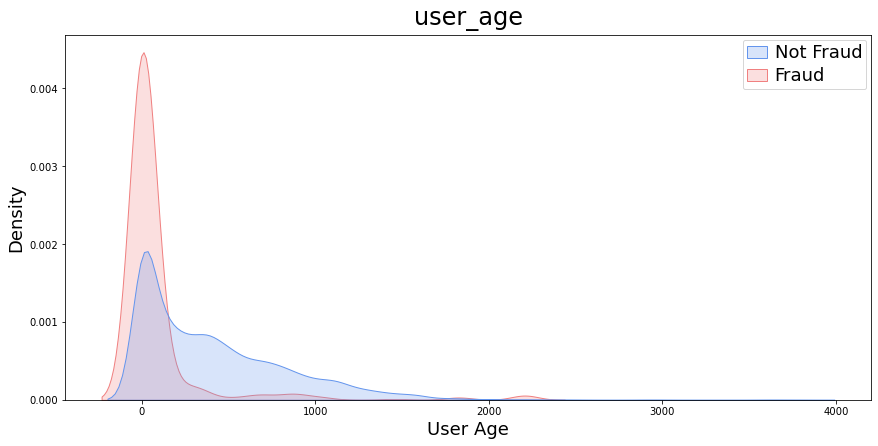

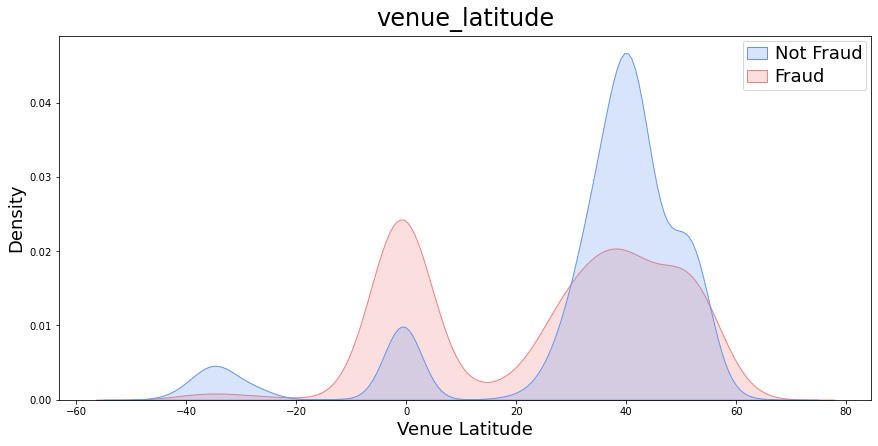

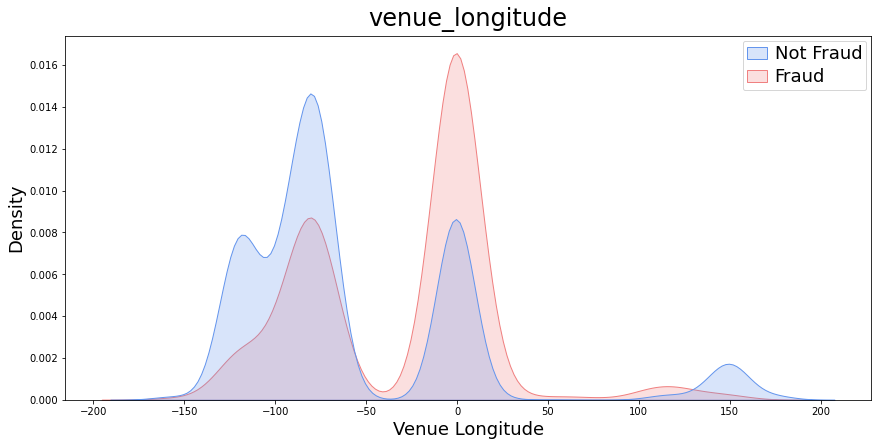

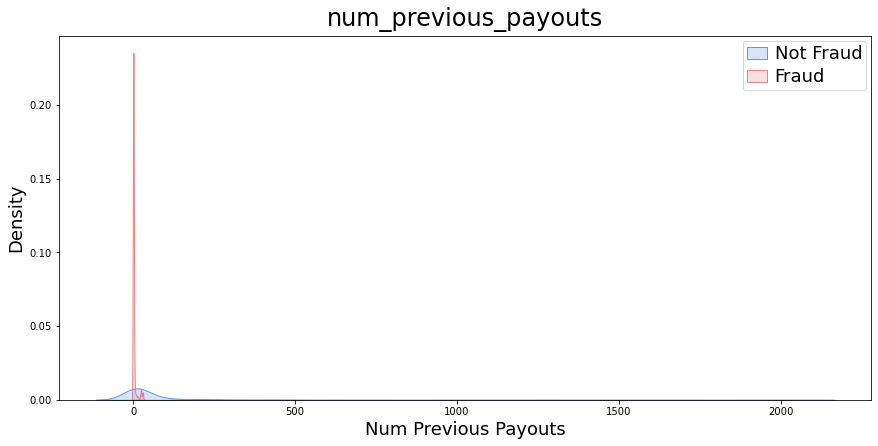

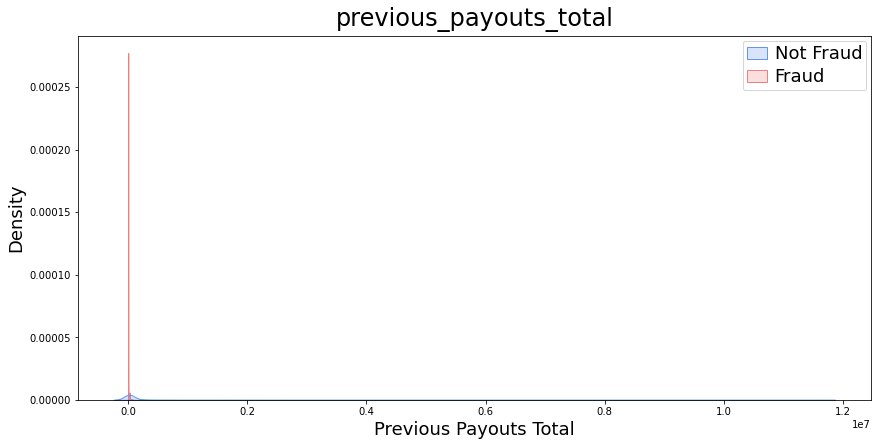

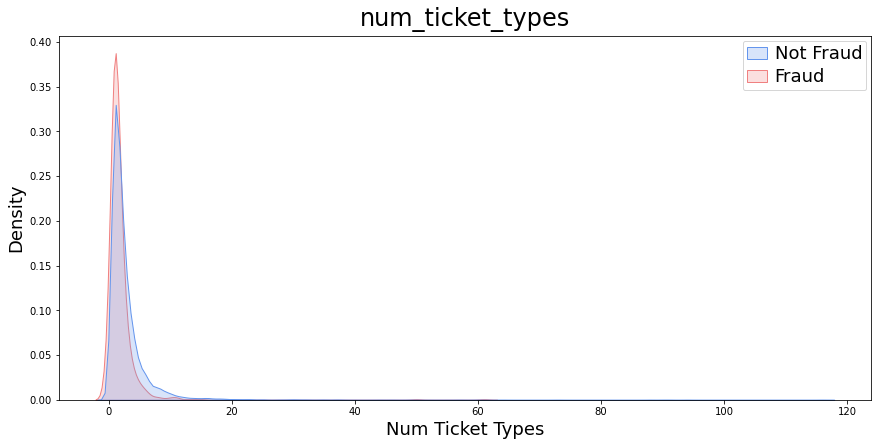

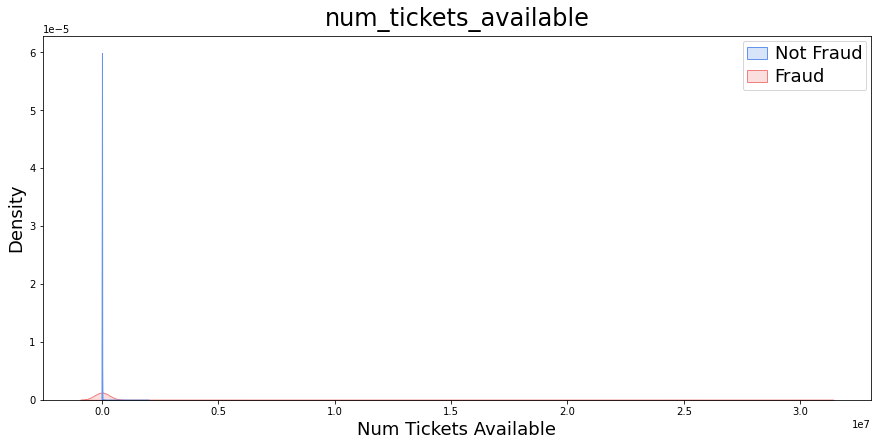

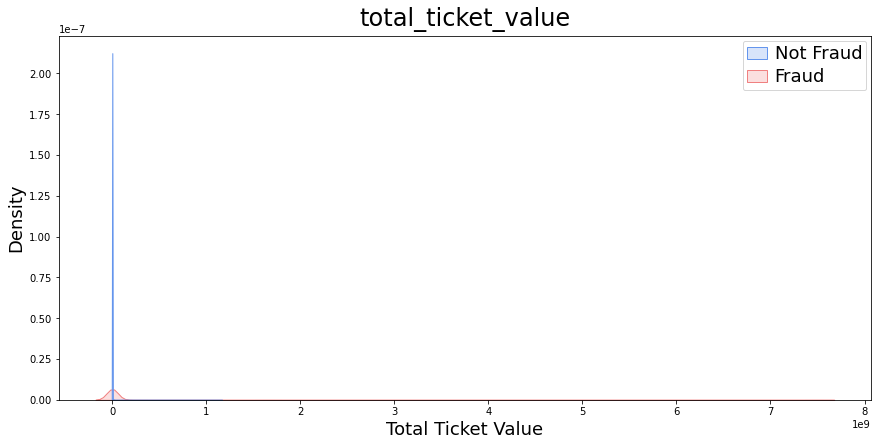

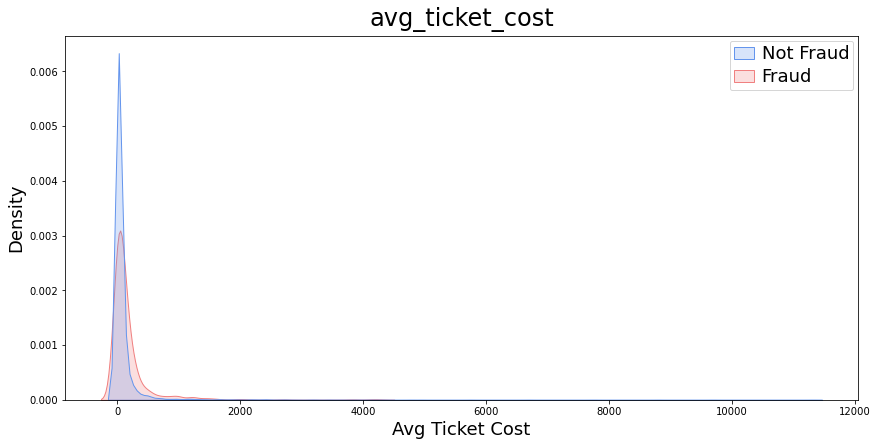

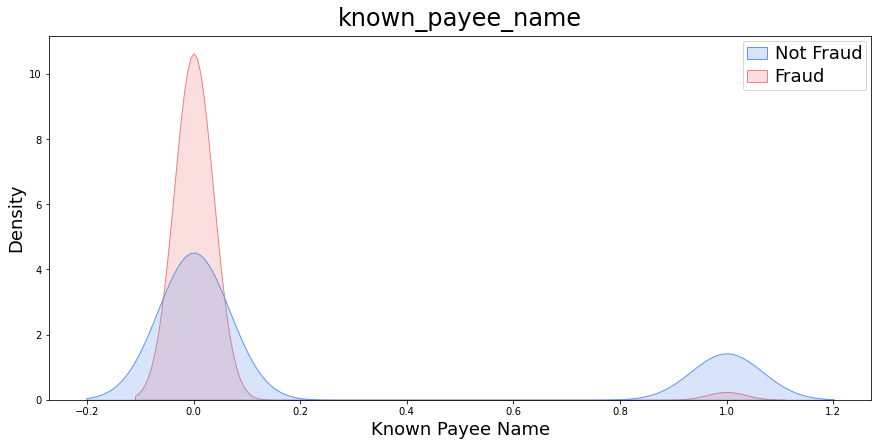

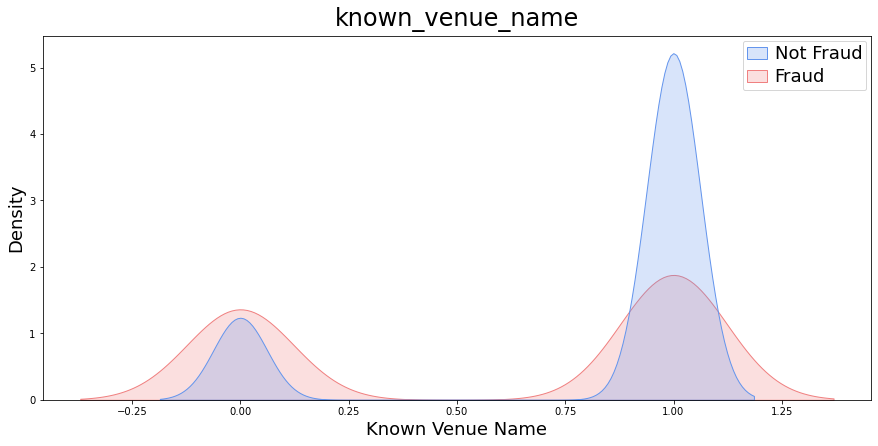

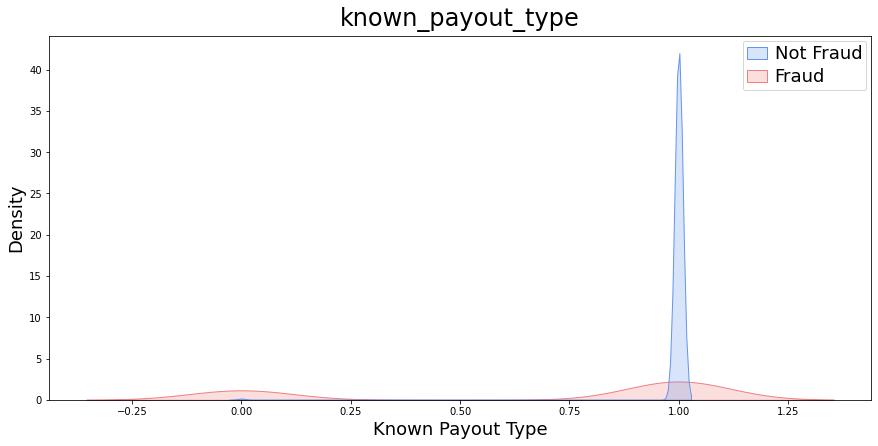

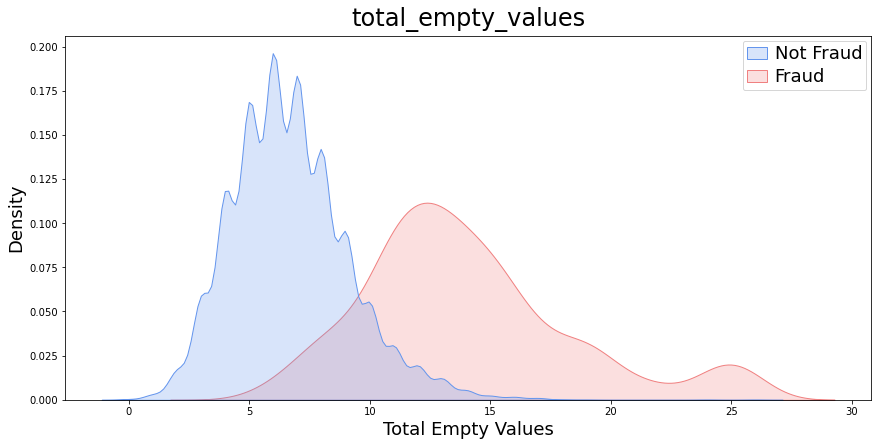

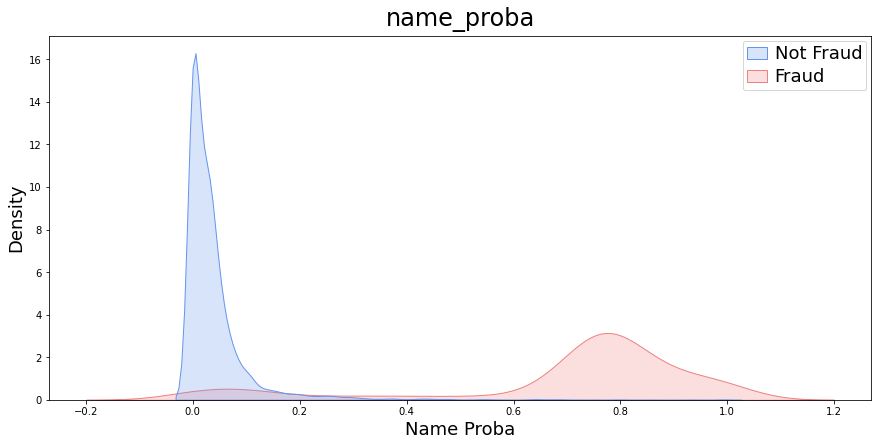

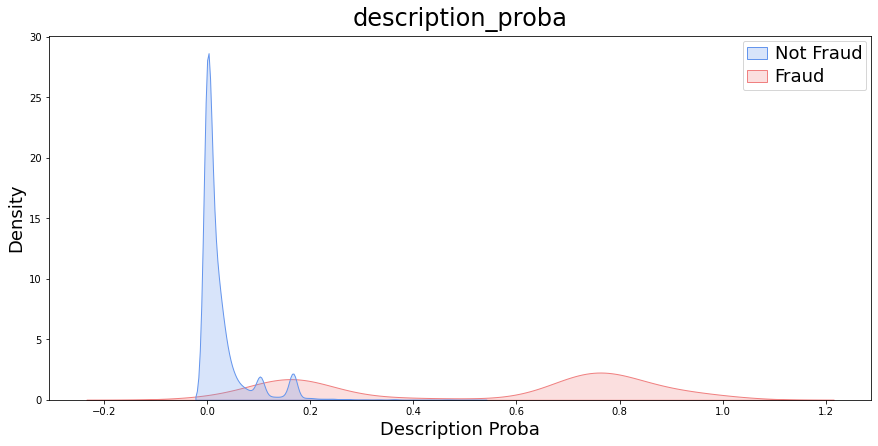

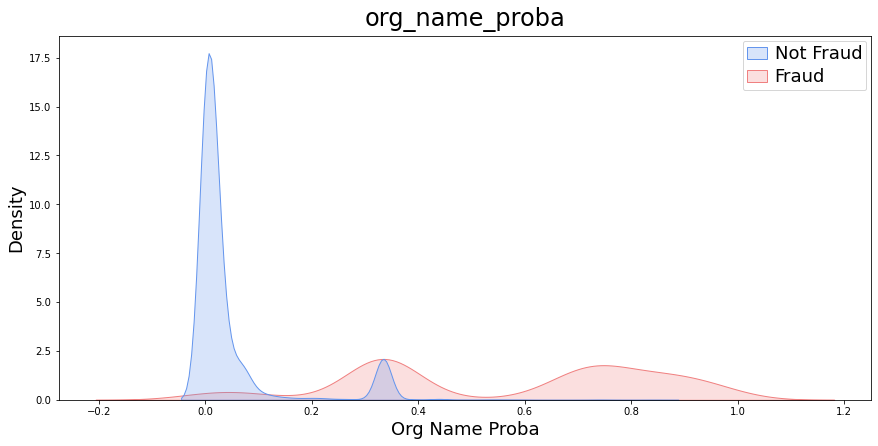

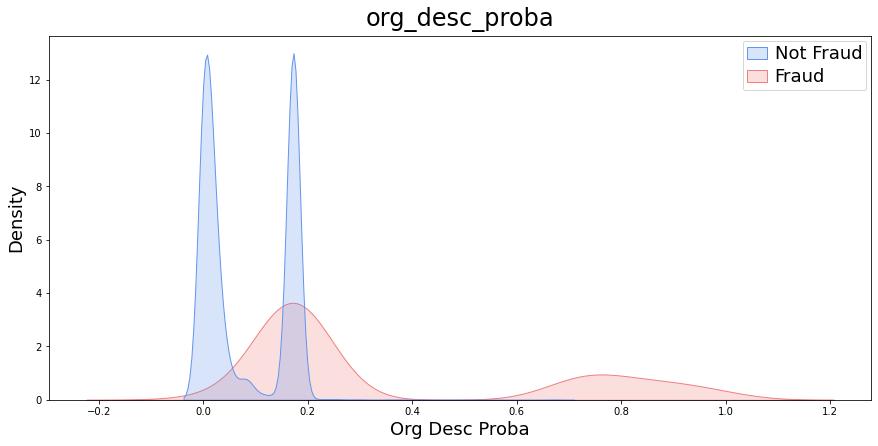

In [175]:
for feature in cd.columns.drop('is_fraud'):
    compare_fraud_vs_not_fraud(cd, feature, feature)